<a href="https://colab.research.google.com/github/btlgs2000/dl_intro/blob/master/nn_tensorflow_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np

In [3]:
t = [1, 2, 3, 4, 5]

In [4]:
t = tf.convert_to_tensor(t)

In [5]:
t

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 4, 5], dtype=int32)>

In [6]:
type(t)

tensorflow.python.framework.ops.EagerTensor

In [7]:
t.shape

TensorShape([5])

In [8]:
t2 = tf.convert_to_tensor([1,2, 3, 4, 5])

In [10]:
t + t2

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([ 2,  4,  6,  8, 10], dtype=int32)>

In [11]:
t2.numpy()

array([1, 2, 3, 4, 5], dtype=int32)

In [14]:
np.max(t)

5

In [16]:
tf.reduce_max(t, axis=0, )

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [17]:
a = np.array([1, 2, 3, 4, 5])

In [18]:
a[0] = 0

In [19]:
a

array([0, 2, 3, 4, 5])

In [20]:
a_tf = tf.convert_to_tensor(a)

In [22]:
a_tf[0] = 10

TypeError: ignored

In [35]:
a_tf = tf.Variable(initial_value=a, dtype=tf.float32)

In [27]:
a_tf.assign([10, 11, 12, 13, 14])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 14])>

In [28]:
a_tf

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 14])>

In [29]:
a_tf[0].assign(2)

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([ 2, 11, 12, 13, 14])>

In [30]:
a_tf

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 2, 11, 12, 13, 14])>

In [31]:
t

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 4, 5], dtype=int32)>

In [39]:
tf.reduce_sum(a_tf * tf.cast(t, tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=54.0>

In [49]:
t = tf.cast(t, tf.float32)
with tf.GradientTape() as tape:
    # tape.watch(t)
    scalar_product = tf.reduce_sum(a_tf * t)

grad = tape.gradient(scalar_product, a_tf)

In [48]:
grad

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 2., 3., 4., 5.], dtype=float32)>

In [50]:
import tensorflow as tf

In [53]:
tf.convert_to_tensor(np.array([1., 2, 3, 4, 5]), dtype=tf.float32)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 2., 3., 4., 5.], dtype=float32)>

In [54]:
type(_)

tensorflow.python.framework.ops.EagerTensor

In [57]:
var = tf.Variable(initial_value=[1, 2, 3], dtype=tf.float32, name='a')

In [58]:
var

<tf.Variable 'a:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [60]:
var.assign([2, 3, 4])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [62]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([3., 4., 5.], dtype=float32)>

In [63]:
var[0].assign(6)

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([6., 4., 5.], dtype=float32)>

In [64]:
var.trainable

True

In [74]:
t = tf.convert_to_tensor([1, 2, 3], dtype=tf.float32)

In [76]:
with tf.GradientTape() as tape:
    sum_ = tf.reduce_sum(var*t)

grad = tape.gradient(sum_, var)

In [77]:
grad

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
with open('filename', 'w'):
    # scrittura sul file

In [65]:
class Callable:
    def __call__(self):
        print('Sono chiamabile')

In [66]:
c = Callable()

In [69]:
c()

Sono chiamabile


In [70]:
class ContextManager:
    def __enter__(self):
        print('inizializzazione')

    def __exit__(self, exception_type, exception_value, traceback):
        print('chiusura')

In [72]:
import time

with ContextManager():
    time.sleep(5)

inizializzazione
chiusura


In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
X = np.random.rand(10_000, 2)
y = 2*X[:, 0] + 3*X[:, 1] - 1

In [12]:
from tqdm import tqdm

epochs = 500
alpha = 0.1
# regressione lineare

theta = tf.Variable(initial_value=[0, 0], dtype=tf.float32)
b = tf.Variable(initial_value=0, dtype=tf.float32)



def mse(y_true, y_pred):
    ''' ritorna il mean square error
    
    y_true (tf.Tensor) - label vere
    y_pred (tf.Tensor) - label predette
    '''
    return tf.reduce_mean((y_true-y_pred)**2)

thetas = []
for epoch in tqdm(range(epochs)):
    # X @ theta(vett colonna) + b = y_pred
    with tf.GradientTape() as tape:
        y_pred = tf.reshape((X @ tf.reshape(theta, (-1, 1)) + b), [-1])
        loss = mse(y, y_pred)
    grad_theta, grad_b = tape.gradient(loss, [theta, b])
    thetas.append(theta.numpy().tolist())
    theta.assign_sub(alpha*grad_theta)
    b.assign_sub(alpha*grad_b)

100%|██████████| 500/500 [00:01<00:00, 395.13it/s]


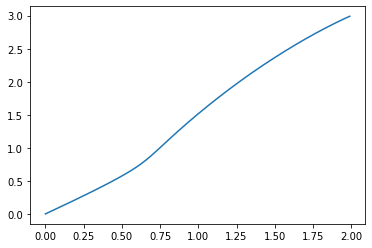

In [9]:
theta1 = [theta[0] for theta in thetas]
theta2 = [theta[1] for theta in thetas]
plt.plot(theta1, theta2)

In [10]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.9906266>

In [11]:
theta

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1.9911435, 2.9911177], dtype=float32)>